# Определение тарифа для телекоммуникационной компании

# Введение

Перед нами представлена информация по двум тарифным планам мобильного оператора «Мегалайн»: «Смарт» и «Ультра». 
Нужно проанализировать имеющуюся информацию по использованию двух тарифов в 2018 году на 500 пользователях, представленную в 5 таблицах. Доступные данные: ФИО и возраст пользователя, город, используемый тариф, а также выгрузка по всем совершенным звонкам, отправленным смс и использованным мегабайтам интернета (сколько их было и какой был расход).

Цель проведения исследования: определить, какой тариф является более прибыльным, для дальнейшей корректировки рекламного бюджета. Для достижения поставленной цели предстоит решить ряд задач, представленных в оглавлении ниже.

# Оглавление 
1. [Общая информация о данных](#step1)
2. [Предобработка данных](#step2)
    1. [Приведение данных к нужному типу](#pre1)
    2. [Поиск и устранение ошибок в данных](#pre2)
    3. [Создание дополнительных столбцов](#pre3)
3. [Анализ данных](#step3)
4. [Проверка гипотез](#step4)
    1. [Гипотеза о различии средней выручки пользователей двух тарифов](#hyp1)
    2. [Гипотеза о различии средней выручки пользователей Москвы и других регионов](#hyp2)
5. [Общий вывод](#step5)

# Раздел 1. Общая информация о данных <a name="step1"></a>

Для начала нам пердстоит посмотреть на те данные, с которыми предстоит работать.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
calls.sample(5)

,id,call_date,duration,user_id
171673,1425_285,2018-09-26,0.23,1425
157472,1390_97,2018-11-28,7.13,1390
93350,1234_31,2018-12-21,4.94,1234
182055,1453_1247,2018-01-20,15.84,1453
162859,1401_294,2018-11-09,6.30,1401


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
internet.sample(5)

,id,mb_used,session_date,user_id
63547,1217_115,0.00,2018-11-29,1217
95999,1324_193,372.60,2018-10-05,1324
64039,1218_167,133.28,2018-10-02,1218
744,1003_68,689.62,2018-12-24,1003
129087,1431_121,150.84,2018-09-19,1431


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
messages.sample(5)

,id,message_date,user_id
55334,1244_500,2018-06-06,1244
88213,1369_138,2018-09-08,1369
64758,1277_1435,2018-09-21,1277
52158,1231_779,2018-06-10,1231
34122,1148_60,2018-05-06,1148


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
91,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
21,1021,61,NaN,Краснодар,Святослав,Тихонов,2018-04-26,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
113,1113,52,NaN,Чита,Харитон,Булгаков,2018-01-24,smart
460,1460,64,NaN,Ижевск,Арина,Абашкина,2018-04-06,smart


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод

Мы посмотрели данные в каждой из 5 таблиц.
В целом можно сказать, что таблицы оформлены грамотно, названия столбцов адекватные, в столбцах нет пропущенных значений (кроме колонки churn_date в датасете users - но мы значем, что это означает, что пользователи на момент выгрузки продолжали пользоваться своим текущим тарифом). Спасибо разработчикам за хорошую выгрузку данных!
В каждой таблице (кроме Тарифов) есть общий столбец user_id - везде его тип integer, значит мы спокойно сможем сопоставлять данные из разных таблиц.

По таблицам:

1. В таблице calls представлены данные по продолжительности каждого звонка каждого абонента. Всего таких звонков было 202607. Здесь даты представлены в формате object, а т.к. нам нужно будет определять, в какой месяц был совершен звонок, то формат данных нужно будет менять. Здесь важно понимать, что даны звонки с учетом секунд, а по факту списание происходит за округленные вверх целые минуты - надо будет сделать дополнительную колонку.
2. Таблица internet представляет из себя аналогичные данные, но уже по трафику интернета. Нужно проделать те же самые манипуляции с аналогичными столбцами. Также таблица содержала "лишнюю" колонку Unnamed: 0, дублирующую столбец с индексами. убрали ее на этапе чтения данных.
3. Таблица messages содержит данные по отправленным смс - здесь нужно только поменять формат даты
4. Таблица с тарифами представляет из себя описание двух тарифов - здесь хранятся данные о ценах и лимитах.
5. В таблице users мы видим информацию о каждом юзере: имя, возраст, город, тариф, дата подключения и отключения. Здесь даты также представлены в неудобном для нас формате. Нулевые значения в колонке churn_date возникли неслучайно, мы можем считать, что соответствующие тарифы работали у абонентов до 31.12.2018. Т.к. для работы нам эти значения скорее всего не потребуются, то заменять их не будем.

Следующий этап - предобработка данных.

# Раздел 2. Предобработка данных <a name="step2"></a>

## 2.1. Приведение данных к нужному типу <a name="pre1"></a>

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Все нужные ячейки переведены в форматы даты.

## 2.2. Поиск и устранение ошибок в данных <a name="pre2"></a>

Посмотрим на столбцы, содержащие информацию о звонках и потребленных мегабайтах интернета, на адекватность представленных в них данных.

In [14]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Половина звонков имеют длительность 6 и менее минут - что ж, это вполне вероятно. Самый длинный звонок длился 38 минут - это кажется довольно мало, сложно обсудить чуть больше, чем за полчаса, все накопившиеся новости со старым другом. Но помним, что нам дана лишь выборка из данных, поэтому будем анализировать то, что есть.
Смущают звонки длиной 0 минут. Т.к. они не тарифицируются и проходят, скорее всего, как пропущенные, можем их смело удалить, чтобы не утяжелять таблицу. Их также и не стоит учитывать при подсчете среднего, т.к. факта звонка по сути не было.

In [15]:
calls = calls[calls['duration'] != 0].reset_index()
calls

,index,id,call_date,duration,user_id
0,2,1000_2,2018-06-11,2.85,1000
1,3,1000_3,2018-09-21,13.80,1000
2,4,1000_4,2018-12-15,5.18,1000
3,7,1000_7,2018-08-22,18.31,1000
4,8,1000_8,2018-09-15,18.44,1000
...,...,...,...,...,...
162989,202602,1499_215,2018-12-26,0.76,1499
162990,202603,1499_216,2018-10-18,18.83,1499
162991,202604,1499_217,2018-11-10,10.81,1499
162992,202605,1499_218,2018-10-06,4.27,1499


Мы убрали почти 40 тыс. строк или 20% исходной таблицы.

In [16]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Видим сессии с нулевым трафиком. Откуда они могли взяться? Возможно, в учёт пошли "случайные" заходы в браузер или в соц.сети - например, при открытии страницы и нахождении на ней менее 1/3/5 сек трафик не считается. Либо же это какая-то системная ошибка, связанная с выгрузкой - нужно обсудить с разработчиками возможные причины.

Раз нулевой трафик не тарифицируется, избавимся и от этих строк.

In [17]:
internet = internet[internet['mb_used'] != 0].reset_index()
internet

,index,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
129793,149390,1499_151,752.72,2018-10-11,1499
129794,149391,1499_152,318.90,2018-10-03,1499
129795,149392,1499_153,490.13,2018-12-14,1499
129796,149394,1499_155,1246.32,2018-11-26,1499


Удалили 20 тыс. строк или 13% исходных данных.

Далее посмотрим на таблицу users. Всё ли здесь в порядке с данными?

In [18]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [19]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [20]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Нижневартовск       1
Подольск            1
Иваново             1
Архангельск         1
Химки               1
Name: city, Length: 76, dtype: int64

Очевидных проблем не видно, поэтому можно двигаться дальше.

## 2.3. Создание дополнительных столбцов <a name="pre3"></a>

Для таблиц со звонками, сообщениями, интернет-трафиком сделаем доп.колонки "Месяц". Для звонков и трафика также дополнительно укажем, сколько единиц (мин или Мб) проходило для тарификации.

In [21]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [22]:
internet['mb_used_counted'] = np.ceil(internet['mb_used'])

In [23]:
internet

,index,id,mb_used,session_date,user_id,month,mb_used_counted
0,0,1000_0,112.95,2018-11-25,1000,11,113.0
1,1,1000_1,1052.81,2018-09-07,1000,9,1053.0
2,2,1000_2,1197.26,2018-06-25,1000,6,1198.0
3,3,1000_3,550.27,2018-08-22,1000,8,551.0
4,4,1000_4,302.56,2018-09-24,1000,9,303.0
...,...,...,...,...,...,...,...
129793,149390,1499_151,752.72,2018-10-11,1499,10,753.0
129794,149391,1499_152,318.90,2018-10-03,1499,10,319.0
129795,149392,1499_153,490.13,2018-12-14,1499,12,491.0
129796,149394,1499_155,1246.32,2018-11-26,1499,11,1247.0


In [24]:
calls['duration_counted'] = np.ceil(calls['duration'])

In [25]:
calls

,index,id,call_date,duration,user_id,month,duration_counted
0,2,1000_2,2018-06-11,2.85,1000,6,3.0
1,3,1000_3,2018-09-21,13.80,1000,9,14.0
2,4,1000_4,2018-12-15,5.18,1000,12,6.0
3,7,1000_7,2018-08-22,18.31,1000,8,19.0
4,8,1000_8,2018-09-15,18.44,1000,9,19.0
...,...,...,...,...,...,...,...
162989,202602,1499_215,2018-12-26,0.76,1499,12,1.0
162990,202603,1499_216,2018-10-18,18.83,1499,10,19.0
162991,202604,1499_217,2018-11-10,10.81,1499,11,11.0
162992,202605,1499_218,2018-10-06,4.27,1499,10,5.0


Для перевода секунд звонков в минуты и мегабайтов трафика в целые значения мы взяли целые части указанных величин и прибавили 1, т.к. даже если звонок длился 1 сек, то "Мегалайн" берет оплату за минуту. Это верно и для целах значений минут звонков: 5.00 минут - звонок, который пошёл на 6ую минуту, а значит тарифицируется как 6 минут. Аналогично и с мегабайтами трафика.

Посчитаем для каждого пользователя следующие данные:
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам

In [26]:
calls_per_id_min = calls.groupby(['user_id', 'month'])[['duration_counted']].agg(['sum']).reset_index()
calls_per_id_min

,user_id,month,duration_counted
,,,sum
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0
...,...,...,...
3163,1498,10,247.0
3164,1499,9,70.0
3165,1499,10,449.0


In [27]:
calls_per_id_count = calls.groupby(['user_id', 'month'])[['duration_counted']].agg(['count']).reset_index()
calls_per_id_count

,user_id,month,duration_counted
,,,count
0,1000,5,17
1,1000,6,28
2,1000,7,41
3,1000,8,42
4,1000,9,46
...,...,...,...
3163,1498,10,30
3164,1499,9,8
3165,1499,10,44


In [28]:
messages_per_id_count = messages.groupby(['user_id', 'month'])[['id']].agg(['count']).reset_index()
messages_per_id_count

,user_id,month,id
,,,count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48


In [29]:
internet_per_id_mb = internet.groupby(['user_id', 'month'])[['mb_used_counted']].agg(['sum']).reset_index()
internet_per_id_mb

,user_id,month,mb_used_counted
,,,sum
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3196,1498,10,20604.0
3197,1499,9,1848.0
3198,1499,10,17809.0


Теперь соберем в одну таблицу все помесячные данные.

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
general_data = calls_per_id_min.merge(calls_per_id_count,how='outer',on=['user_id','month']).reset_index()
general_data

index user_id month duration_counted      
                                      sum count
0        0    1000     5            159.0    17
1        1    1000     6            172.0    28
2        2    1000     7            340.0    41
3        3    1000     8            408.0    42
4        4    1000     9            466.0    46
...    ...     ...   ...              ...   ...
3163  3163    1498    10            247.0    30
3164  3164    1499     9             70.0     8
3165  3165    1499    10            449.0    44
3166  3166    1499    11            612.0    62
3167  3167    1499    12            492.0    56

[3168 rows x 5 columns]

In [32]:
general_data = general_data.merge(messages_per_id_count,how='outer',on=['user_id','month'])
general_data

index user_id month duration_counted          id
                                      sum count count
0      0.0    1000     5            159.0  17.0  22.0
1      1.0    1000     6            172.0  28.0  60.0
2      2.0    1000     7            340.0  41.0  75.0
3      3.0    1000     8            408.0  42.0  81.0
4      4.0    1000     9            466.0  46.0  57.0
...    ...     ...   ...              ...   ...   ...
3207   NaN    1489     8              NaN   NaN  17.0
3208   NaN    1489     9              NaN   NaN  32.0
3209   NaN    1489    10              NaN   NaN  21.0
3210   NaN    1489    11              NaN   NaN  20.0
3211   NaN    1489    12              NaN   NaN  35.0

[3212 rows x 6 columns]

In [33]:
general_data = general_data.merge(internet_per_id_mb,how='outer',on=['user_id','month'])
general_data

index user_id month duration_counted          id mb_used_counted
                                      sum count count             sum
0      0.0    1000     5            159.0  17.0  22.0          2256.0
1      1.0    1000     6            172.0  28.0  60.0         23257.0
2      2.0    1000     7            340.0  41.0  75.0         14016.0
3      3.0    1000     8            408.0  42.0  81.0         14070.0
4      4.0    1000     9            466.0  46.0  57.0         14581.0
...    ...     ...   ...              ...   ...   ...             ...
3209   NaN    1489    10              NaN   NaN  21.0         19588.0
3210   NaN    1489    11              NaN   NaN  20.0         17516.0
3211   NaN    1489    12              NaN   NaN  35.0         17341.0
3212   NaN    1240     2              NaN   NaN   NaN           961.0
3213   NaN    1476     4              NaN   NaN   NaN           531.0

[3214 rows x 7 columns]

In [34]:
general_data.columns = ['index', 'user_id', 'month', 'calls_min', 'calls_count', 'messages_count', 'internet_mb']

In [35]:
general_data = general_data[['user_id', 'month', 'calls_min', 'calls_count', 'messages_count', 'internet_mb']]

In [36]:
general_data

,user_id,month,calls_min,calls_count,messages_count,internet_mb
0,1000,5,159.0,17.0,22.0,2256.0
1,1000,6,172.0,28.0,60.0,23257.0
2,1000,7,340.0,41.0,75.0,14016.0
3,1000,8,408.0,42.0,81.0,14070.0
4,1000,9,466.0,46.0,57.0,14581.0
...,...,...,...,...,...,...
3209,1489,10,NaN,NaN,21.0,19588.0
3210,1489,11,NaN,NaN,20.0,17516.0
3211,1489,12,NaN,NaN,35.0,17341.0
3212,1240,2,NaN,NaN,NaN,961.0


In [37]:
tariffs_for_user = users[['user_id', 'tariff']]

In [38]:
general_data = general_data.merge(tariffs_for_user,how='left',on='user_id')

In [39]:
general_data

,user_id,month,calls_min,calls_count,messages_count,internet_mb,tariff
0,1000,5,159.0,17.0,22.0,2256.0,ultra
1,1000,6,172.0,28.0,60.0,23257.0,ultra
2,1000,7,340.0,41.0,75.0,14016.0,ultra
3,1000,8,408.0,42.0,81.0,14070.0,ultra
4,1000,9,466.0,46.0,57.0,14581.0,ultra
...,...,...,...,...,...,...,...
3209,1489,10,NaN,NaN,21.0,19588.0,smart
3210,1489,11,NaN,NaN,20.0,17516.0,smart
3211,1489,12,NaN,NaN,35.0,17341.0,smart
3212,1240,2,NaN,NaN,NaN,961.0,ultra


In [40]:
#NaN в данных означает, что у конкретного человека не было в этом месяце звонков/сообщений/потраченного трафика. 
#Значит можно заменить их на 0
general_data = general_data.fillna(0)    

In [41]:
general_data

,user_id,month,calls_min,calls_count,messages_count,internet_mb,tariff
0,1000,5,159.0,17.0,22.0,2256.0,ultra
1,1000,6,172.0,28.0,60.0,23257.0,ultra
2,1000,7,340.0,41.0,75.0,14016.0,ultra
3,1000,8,408.0,42.0,81.0,14070.0,ultra
4,1000,9,466.0,46.0,57.0,14581.0,ultra
...,...,...,...,...,...,...,...
3209,1489,10,0.0,0.0,21.0,19588.0,smart
3210,1489,11,0.0,0.0,20.0,17516.0,smart
3211,1489,12,0.0,0.0,35.0,17341.0,smart
3212,1240,2,0.0,0.0,0.0,961.0,ultra


Итоговая таблица для расчетов собрана.
Но прежде чем перейти к подсчету выручки, проверим удалось ли нам правильно сджойнить данные, не потеряв значений.

In [42]:
print(general_data['calls_min'].sum())
print(calls['duration_counted'].sum())

1450301.0
1450301.0


In [43]:
print(general_data['calls_count'].sum())
print(calls['id'].count())

162994.0
162994


In [44]:
print(general_data['messages_count'].sum())
print(messages['id'].count())

123036.0
123036


In [45]:
print(general_data['internet_mb'].sum())
print(internet['mb_used_counted'].sum())

55369459.0
55369459.0


Все суммы в исходных таблицах и в объединенной таблице general_data совпали, значит объединение таблиц прошло успешно.

Теперь посчитаем по каждому клиенту выручку в зависимости от того, какой тариф он выбрал.
Для этого добавим новые столбцы:
 - вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
 - остаток умножим на значение из тарифного плана (получим доход от экстра-услуг, превысивших тарифные лимиты); 
 - прибавим абонентскую плату, соответствующую тарифному плану (получим общую выручку от каждого абонента в каждый месяц).

In [46]:
general_data

,user_id,month,calls_min,calls_count,messages_count,internet_mb,tariff
0,1000,5,159.0,17.0,22.0,2256.0,ultra
1,1000,6,172.0,28.0,60.0,23257.0,ultra
2,1000,7,340.0,41.0,75.0,14016.0,ultra
3,1000,8,408.0,42.0,81.0,14070.0,ultra
4,1000,9,466.0,46.0,57.0,14581.0,ultra
...,...,...,...,...,...,...,...
3209,1489,10,0.0,0.0,21.0,19588.0,smart
3210,1489,11,0.0,0.0,20.0,17516.0,smart
3211,1489,12,0.0,0.0,35.0,17341.0,smart
3212,1240,2,0.0,0.0,0.0,961.0,ultra


In [47]:
def minutes_extra(row):
    if row['tariff'] == 'smart':
        return row['calls_min'] - tariffs['minutes_included'][0]
    elif row['tariff'] == 'ultra':
        return row['calls_min'] - tariffs['minutes_included'][1]

general_data['minutes_extra'] = general_data.apply(minutes_extra, axis=1)

In [48]:
def messages_extra(row):
    if row['tariff'] == 'smart':
        return row['messages_count'] - tariffs['messages_included'][0]
    elif row['tariff'] == 'ultra':
        return row['messages_count'] - tariffs['messages_included'][1]

general_data['messages_extra'] = general_data.apply(messages_extra, axis=1)

In [49]:
def mb_extra(row):
    if row['tariff'] == 'smart':
        return row['internet_mb'] - tariffs['mb_per_month_included'][0]
    elif row['tariff'] == 'ultra':
        return row['internet_mb'] - tariffs['mb_per_month_included'][1]

general_data['mb_extra'] = general_data.apply(mb_extra, axis=1)

In [50]:
general_data

,user_id,month,calls_min,calls_count,messages_count,internet_mb,tariff,minutes_extra,messages_extra,mb_extra
0,1000,5,159.0,17.0,22.0,2256.0,ultra,-2841.0,-978.0,-28464.0
1,1000,6,172.0,28.0,60.0,23257.0,ultra,-2828.0,-940.0,-7463.0
2,1000,7,340.0,41.0,75.0,14016.0,ultra,-2660.0,-925.0,-16704.0
3,1000,8,408.0,42.0,81.0,14070.0,ultra,-2592.0,-919.0,-16650.0
4,1000,9,466.0,46.0,57.0,14581.0,ultra,-2534.0,-943.0,-16139.0
...,...,...,...,...,...,...,...,...,...,...
3209,1489,10,0.0,0.0,21.0,19588.0,smart,-500.0,-29.0,4228.0
3210,1489,11,0.0,0.0,20.0,17516.0,smart,-500.0,-30.0,2156.0
3211,1489,12,0.0,0.0,35.0,17341.0,smart,-500.0,-15.0,1981.0
3212,1240,2,0.0,0.0,0.0,961.0,ultra,-3000.0,-1000.0,-29759.0


In [51]:
general_data['minutes_extra'][general_data['minutes_extra'] < 0] = 0
general_data['messages_extra'][general_data['messages_extra'] < 0] = 0
general_data['mb_extra'][general_data['mb_extra'] < 0] = 0

In [52]:
general_data

,user_id,month,calls_min,calls_count,messages_count,internet_mb,tariff,minutes_extra,messages_extra,mb_extra
0,1000,5,159.0,17.0,22.0,2256.0,ultra,0.0,0.0,0.0
1,1000,6,172.0,28.0,60.0,23257.0,ultra,0.0,0.0,0.0
2,1000,7,340.0,41.0,75.0,14016.0,ultra,0.0,0.0,0.0
3,1000,8,408.0,42.0,81.0,14070.0,ultra,0.0,0.0,0.0
4,1000,9,466.0,46.0,57.0,14581.0,ultra,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3209,1489,10,0.0,0.0,21.0,19588.0,smart,0.0,0.0,4228.0
3210,1489,11,0.0,0.0,20.0,17516.0,smart,0.0,0.0,2156.0
3211,1489,12,0.0,0.0,35.0,17341.0,smart,0.0,0.0,1981.0
3212,1240,2,0.0,0.0,0.0,961.0,ultra,0.0,0.0,0.0


In [53]:
def get_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_mb = 0
    
    if row['tariff'] == 'smart':
 
        if row['minutes_extra'] > 0:
            revenue_by_min = row['minutes_extra'] * tariffs['rub_per_minute'][0]
        
        if row['messages_extra'] > 0:
            revenue_by_messages = row['messages_extra'] * tariffs['rub_per_message'][0]
        
        if row['mb_extra'] > 0:
            revenue_mb = (row['mb_extra'] / 1024) * tariffs['rub_per_gb'][0]
                
    elif row['tariff'] == 'ultra':
        
        if row['minutes_extra'] > 0:
            revenue_by_min = row['minutes_extra'] * tariffs['rub_per_minute'][1]
        
        if row['messages_extra'] > 0:
            revenue_by_messages = row['messages_extra'] * tariffs['rub_per_message'][1]
        
        if row['mb_extra'] > 0:
            revenue_mb = (row['mb_extra'] / 1024) * tariffs['rub_per_gb'][1]
                
    return revenue_by_min + revenue_by_messages + revenue_mb

general_data['revenue_extra'] = general_data.apply(get_revenue, axis=1)

In [54]:
general_data['revenue_extra'] = general_data['revenue_extra'].astype(int)

In [55]:
general_data

,user_id,month,calls_min,calls_count,messages_count,internet_mb,tariff,minutes_extra,messages_extra,mb_extra,revenue_extra
0,1000,5,159.0,17.0,22.0,2256.0,ultra,0.0,0.0,0.0,0
1,1000,6,172.0,28.0,60.0,23257.0,ultra,0.0,0.0,0.0,0
2,1000,7,340.0,41.0,75.0,14016.0,ultra,0.0,0.0,0.0,0
3,1000,8,408.0,42.0,81.0,14070.0,ultra,0.0,0.0,0.0,0
4,1000,9,466.0,46.0,57.0,14581.0,ultra,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,10,0.0,0.0,21.0,19588.0,smart,0.0,0.0,4228.0,825
3210,1489,11,0.0,0.0,20.0,17516.0,smart,0.0,0.0,2156.0,421
3211,1489,12,0.0,0.0,35.0,17341.0,smart,0.0,0.0,1981.0,386
3212,1240,2,0.0,0.0,0.0,961.0,ultra,0.0,0.0,0.0,0


In [56]:
def revenue_total(row):
    if row['tariff'] == 'smart':
        return row['revenue_extra'] + tariffs['rub_monthly_fee'][0]
    elif row['tariff'] == 'ultra':
        return row['revenue_extra'] + tariffs['rub_monthly_fee'][1]

general_data['revenue_total'] = general_data.apply(revenue_total, axis=1)

In [57]:
general_data

,user_id,month,calls_min,calls_count,messages_count,internet_mb,tariff,minutes_extra,messages_extra,mb_extra,revenue_extra,revenue_total
0,1000,5,159.0,17.0,22.0,2256.0,ultra,0.0,0.0,0.0,0,1950
1,1000,6,172.0,28.0,60.0,23257.0,ultra,0.0,0.0,0.0,0,1950
2,1000,7,340.0,41.0,75.0,14016.0,ultra,0.0,0.0,0.0,0,1950
3,1000,8,408.0,42.0,81.0,14070.0,ultra,0.0,0.0,0.0,0,1950
4,1000,9,466.0,46.0,57.0,14581.0,ultra,0.0,0.0,0.0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,10,0.0,0.0,21.0,19588.0,smart,0.0,0.0,4228.0,825,1375
3210,1489,11,0.0,0.0,20.0,17516.0,smart,0.0,0.0,2156.0,421,971
3211,1489,12,0.0,0.0,35.0,17341.0,smart,0.0,0.0,1981.0,386,936
3212,1240,2,0.0,0.0,0.0,961.0,ultra,0.0,0.0,0.0,0,1950


### Вывод

Мы провели обработку данных, проделав следующие действия:
1. Посчитали, сколько минут звонков и мегабайтов интернета проходило по тарификации (в соответствии с условиями тарифа, округлили до верхнего значения)
2. Рассчитали для каждого пользователя помесячные данные по количеству сделанных звонков и израсходованных минут разговора, количеству отправленных сообщений и объему израсходованного интернет-трафика.
3. Объединили все полученные данные в единую таблицу
4. Посчитали, какую выручку мы получили от каждого клиента за каждый месяц.

В итоговой таблице у нас получилось 3214 строк.

На следующем шаге проанализируем полученные данные: посмотрим, как отличаетсю пользовательские привычки обладателей обоих тарифов.


# Раздел 3. Анализ данных <a name="step3"></a>

Проанализируем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

Посчитаем среднее количество, дисперсию и стандартное отклонение применительно к сгруппировнным по названию тарифа данным.

Будем работать с уже полученными значениями, хотя в качестве средних можно было также посчитать не ежемесячную выручку на пользователя, а её среднее значение по всем месяцам, тогда бы для каждого пользователя у нас была 1 строка. Здесь каждый пользователь представлен разными строками, т.е. рассматриваем поведение пользователя как различное в каждый месяц его пользования услугами мобильного оператора.

In [58]:
general_data_grouped_mean = general_data.groupby('tariff')[['calls_min', 'messages_count', 'internet_mb']].mean()

In [59]:
general_data_grouped_mean

,calls_min,messages_count,internet_mb
tariff,,,
smart,417.934948,33.384029,16229.188425
ultra,526.623350,49.363452,19486.901523


Видим, что более дешевый тариф "Смарт" (с абонентской платой 550 рублей), выбирают пользователи, которые в среднем делают меньше звонков, пишут меньше смс и используют меньше интернета. Им в среднем хватает лимита по звонкам и смс, однако за интернет чаще приходится доплачивать - лимит составляет 15360 Мб, почти 1ГБ трафика в среднем приходится оплачивать дополнительно (по цене 200 рублей).

"Ультровцы" в среднем легко вписываются в указанные по тарифу ограничения, однако есть ощущение, что они переплачивают: при среднем расходе, превыщающем число минут, сообщений и Мб пользователей тарифа "Смарт" на 26%, 48% и 20% соответственно, плата за тариф у них непропорционально больше - на 254% (или в 3,5 раза).

In [60]:
general_data_grouped_variance = general_data.groupby('tariff')[['calls_min', 'messages_count', 'internet_mb']].var()

In [61]:
general_data_grouped_variance

,calls_min,messages_count,internet_mb
tariff,,,
smart,36219.315784,796.812958,3.454591e+07
ultra,100873.633397,2285.266143,1.019356e+08


Дисперсия показывает величину разброса значений — средний квадрат расстояния между значениями выборки и средним. Видим, что для пользователей тарифа "Ультра" она больше - значит несмотря на то, что в среднем у них число потраченных звонков, смс и мегабайт больше, есть пользователи, которые сильнее отклоняются от среднего (в обе стороны) - а значит, вероятно, тратят и сильно больше звонков и пр. Лучше это можно будет увидеть на гистограмме далее.

In [62]:
general_data_grouped_std = general_data.groupby('tariff')[['calls_min', 'messages_count', 'internet_mb']].std()

In [63]:
general_data_grouped_std

,calls_min,messages_count,internet_mb
tariff,,,
smart,190.313730,28.227876,5877.576978
ultra,317.606098,47.804457,10096.317202


Разброс значений показывает и стандартное отклонение. Здесь интересно, что среднее использование интернета по двум тарифам отличалось всего в 1,2 раза, а вот стандартное отклонение - уже в 2 раза.

In [64]:
general_data_smart = general_data.query('tariff == "smart"')
general_data_ultra = general_data.query('tariff == "ultra"')

In [65]:
general_data_smart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 8 to 3211
Data columns (total 12 columns):
user_id           2229 non-null int64
month             2229 non-null int64
calls_min         2229 non-null float64
calls_count       2229 non-null float64
messages_count    2229 non-null float64
internet_mb       2229 non-null float64
tariff            2229 non-null object
minutes_extra     2229 non-null float64
messages_extra    2229 non-null float64
mb_extra          2229 non-null float64
revenue_extra     2229 non-null int64
revenue_total     2229 non-null int64
dtypes: float64(7), int64(4), object(1)
memory usage: 226.4+ KB


In [66]:
general_data_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 3213
Data columns (total 12 columns):
user_id           985 non-null int64
month             985 non-null int64
calls_min         985 non-null float64
calls_count       985 non-null float64
messages_count    985 non-null float64
internet_mb       985 non-null float64
tariff            985 non-null object
minutes_extra     985 non-null float64
messages_extra    985 non-null float64
mb_extra          985 non-null float64
revenue_extra     985 non-null int64
revenue_total     985 non-null int64
dtypes: float64(7), int64(4), object(1)
memory usage: 100.0+ KB


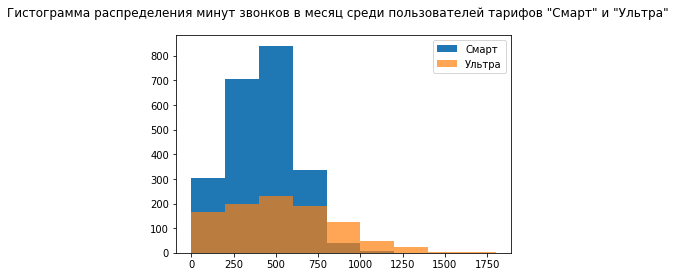

In [67]:
plt.hist(general_data_smart['calls_min'], bins=9, range=(0,  1800), label='Смарт')
plt.hist(general_data_ultra['calls_min'], bins=9, range=(0,  1800), label='Ультра', alpha = 0.7)
plt.suptitle('Гистограмма распределения минут звонков в месяц среди пользователей тарифов "Смарт" и "Ультра"')
plt.legend()

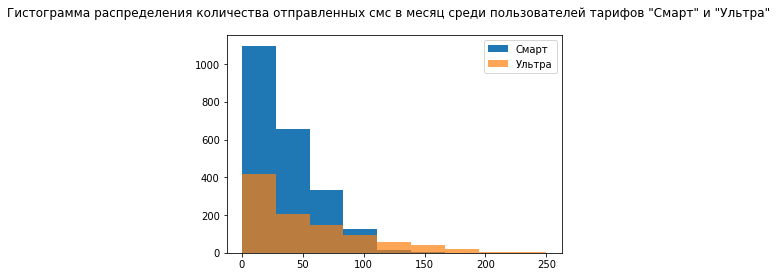

In [68]:
plt.hist(general_data_smart['messages_count'], bins=9, range=(0,  250), label='Смарт')
plt.hist(general_data_ultra['messages_count'], bins=9, range=(0,  250), label='Ультра', alpha = 0.7)
plt.suptitle('Гистограмма распределения количества отправленных смс в месяц среди пользователей тарифов "Смарт" и "Ультра"')
plt.legend()

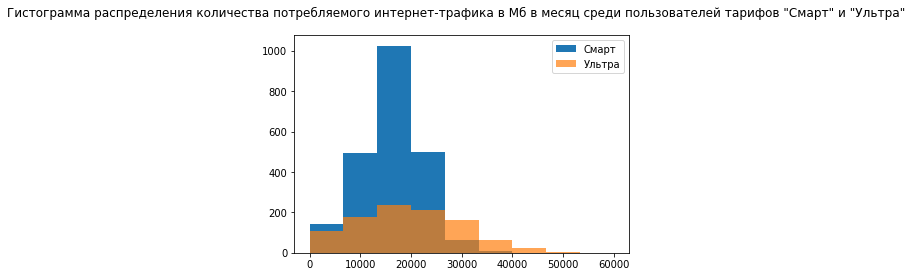

In [69]:
plt.hist(general_data_smart['internet_mb'], bins=9, range=(0,  60000), label='Смарт')
plt.hist(general_data_ultra['internet_mb'], bins=9, range=(0,  60000), label='Ультра', alpha = 0.7)
plt.suptitle('Гистограмма распределения количества потребляемого интернет-трафика в Мб в месяц среди пользователей тарифов "Смарт" и "Ультра"')
plt.legend()

Посмотрим также, как выглядит выручка, которую приносят клиенты, в зависимости от их тарифа.

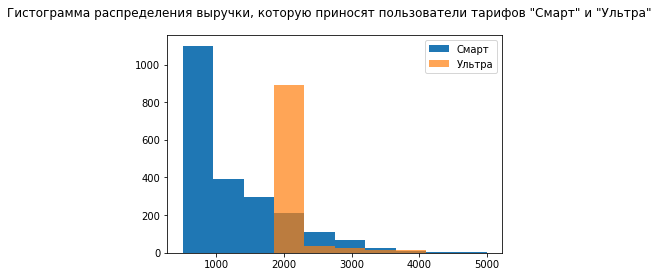

In [70]:
plt.hist(general_data_smart['revenue_total'], bins=10, range=(500,  5000), label='Смарт')
plt.hist(general_data_ultra['revenue_total'], bins=10, range=(500,  5000), label='Ультра', alpha = 0.7)
plt.suptitle('Гистограмма распределения выручки, которую приносят пользователи тарифов "Смарт" и "Ультра"')
plt.legend()

### Вывод

Сравнение поведения пользователей двух тарифов оператора "Мегалайн" показывает следующее.
1. В нашей выборке из 500 клиентов преобладают пользователи "дешевого" тарифа "Смарт": в собранной таблице по месяцам 2229 строк относится к нему и 985 (в 2,3 раза меньше) - к тарифу "Ультра".
2. Пользователи тарифа "Ультра" могут говорить бесплатно 3000 минут в месяц, "Смарт" - 500 минут в месяц. При этом в среднем первые используют всего на 26% минут разговора больше. Гистограмма же показывает, что среди обеих групп больше всего человек говорят в диапазоне 450-550 минут. Видимо именно поэтому был взят такой "порог" для минимального тарифа. У пользователей тарифа "Ультра" виден бОльший разброс в данных: среди них довольно велик процент тех, кто разговаривает меньше 250 минут, но есть и те, кто разговаривали больше 1200 минут. Однако к пороговому значению в 3000 минут близко никто не подобрался. Посмотрим, имело ли вообще смысл ставить такой большой порог.
Для пользователей тарифа "Ультра" верхняя граница, куда должны входить 99% всех значений, определяется как μ+3σ = 527 + 3 * 318 = 1481. Т.е. достаточно было указать в тарифе значение в 1500 минут, чтобы абсолютное большинство пользователей "попали" в лимит. Скорее всего, компания знала об этом, и цифра 3000 минут возникла как маркетинговый ход, т.к. звучит очень внушиельно, и именно по этому принципу данный тариф могут выбирать состоятельные люди.
3. Вполне ожидаемо пользователи обоих тарифов не очень-то любят писать смс: большинство людей в обеих группах в месяц написали менее 25 штук. Далее с каждым "шагом" в 25 смс мы видимо всё меньшую частоту встречаемости данных. Совсем уж редкие пользователи пишут более 150 смс в день. Поэтому опять же для тарифа"Ультра" лимит находится далеко за предельным значением выборки, а вот некоторые "смартовцы" даже переплачивали за дополнительное количество смс. (Интересно, кто эти люди, скорее всего, более возрастная аудитория, которая по каким-то причинам не знакома с мессенджерами либо имеет "кнопочный" телефон без выхода в интернет.)
4. Гистограммы распределения пользователей по месяцам по использованным ими мегабайтам интернет-трафика в обоих случаях отдаленно напоминаю графики нормального распределения, однако с немного отличающимися пиками: для пользователей "Смарт" самое частое использование трафика - на уровне 1200-1800 Мб в месяц, для "ультровцев" - примерно 1800-2400 Мб. При этом бесплатный лимит у "смартовцев" составляет 15360 Мб - примерно в половине случаев им приходится вносить оплату сверх тарифа - и для "Мегалайн" это основной источник доп.прибыли (помимо основного - помесячной оплаты за тариф). В случае с интернетом, и не все пользователи тарифа "Ультра" укладываются в лимит, равный 30730 Мб. (Их, однако, сильно меньше.) Но цена дополнительного гигабайта для них ниже - 150 р. против 200 р. 
5. График общей выручки, которую получает от своих пользователей "Мегалайн", показывает, что пользователи тарифа "Смарт" в основном тратят до 900 рублей - вероятно, большинство из них - те, кто уложился в условия тарифа и заплатил только 550 рублей. Однако среди них довольно высок процент тех, кто переплачивает: 1000, 1500 и даже 3500 рублей. Абсолютное же большинство "ультровцев" укладывается в бюджет своей платы за тариф: 1950 рублей.

# Раздел 4. Проверка гипотез <a name="step4"></a>

В данном разделе нам предстоит проверить 2 гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## 4.1. Гипотеза о различии средней выручки пользователей двух тарифов <a name="hyp1"></a>

Для проверки равенства средней выручки пользователей двух тарифов сформулируем нулевую гипотезу H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны. Тогда альтернативная гипотеза H1 будет звучать так: средняя выручка пользователей тарифа «Ультра» отличается от средней выручки пользователей тарифа «Смарт». Проверим это с помощью t-теста.

In [71]:
alpha = .05

results_tariffs = st.ttest_ind(
    general_data_smart['revenue_total'], 
    general_data_ultra['revenue_total'],
    equal_var=False)

print('p-значение:', results_tariffs.pvalue)

if (results_tariffs.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.133013116078655e-296
Отвергаем нулевую гипотезу


Получается, средние выручки пользователей двух тарифов не совпадают до статистического уровня значимости. Ради интереса посмотрим также на их средние значения.

In [72]:
print(general_data_smart['revenue_total'].mean())
print(general_data_ultra['revenue_total'].mean()) 

1233.0578734858682
2060.4629441624365


Видим, что средние значения выручки по тарифам отличаются почти в 2 раза.

## 4.2. Гипотеза о различии средней выручки пользователей Москвы и других регионов <a name="hyp2"></a>

Для данной задачи нулевая гипотеза H0 будет формулироваться следующим образом: средняя выручка пользователей из Москвы и из других регионов равны.  Тогда альтернативная гипотеза H1: средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других городов. Для проверки также воспользуемся t-тестом.

In [73]:
users_city = users[['user_id', 'city']]
general_data = general_data.merge(users_city,how='left',on=['user_id'])

In [74]:
general_data_moscow = general_data.query('city == "Москва"')
general_data_other_cities = general_data.query('city != "Москва"')

In [75]:
general_data_moscow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 8 to 3213
Data columns (total 13 columns):
user_id           611 non-null int64
month             611 non-null int64
calls_min         611 non-null float64
calls_count       611 non-null float64
messages_count    611 non-null float64
internet_mb       611 non-null float64
tariff            611 non-null object
minutes_extra     611 non-null float64
messages_extra    611 non-null float64
mb_extra          611 non-null float64
revenue_extra     611 non-null int64
revenue_total     611 non-null int64
city              611 non-null object
dtypes: float64(7), int64(4), object(2)
memory usage: 66.8+ KB


In [76]:
general_data_other_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 0 to 3212
Data columns (total 13 columns):
user_id           2603 non-null int64
month             2603 non-null int64
calls_min         2603 non-null float64
calls_count       2603 non-null float64
messages_count    2603 non-null float64
internet_mb       2603 non-null float64
tariff            2603 non-null object
minutes_extra     2603 non-null float64
messages_extra    2603 non-null float64
mb_extra          2603 non-null float64
revenue_extra     2603 non-null int64
revenue_total     2603 non-null int64
city              2603 non-null object
dtypes: float64(7), int64(4), object(2)
memory usage: 284.7+ KB


Всего в нашей итоговой таблице мы видим 611 строк, относящихся к пользователям из Москвы, и 2603 - к пользователям из других регионов.

Посмотрим на дисперсии выборок,чтобы понять, с каким параметром использовать проверку гипотезы через T-критерий Стьюдента. 

In [77]:
print(np.var(general_data_moscow['revenue_total']))
print(np.var(general_data_other_cities['revenue_total']))

546237.2279030647
630158.78585674


Значения дисперсий не очень близки, поэтому, как и в предыдущем случае, используем параметр equal_var=False.

In [78]:
results_cities = st.ttest_ind(
    general_data_moscow['revenue_total'], 
    general_data_other_cities['revenue_total'],
    equal_var=False)

print('p-значение:', results_cities.pvalue)

if (results_cities.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4546446281204245
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, значит средняя выручка пользователей из Москвы и других городов по месяцам статистически не различается.
Посмотрим также на средние значения этих показателей.

In [79]:
print(general_data_moscow['revenue_total'].mean())
print(general_data_other_cities['revenue_total'].mean()) 

1507.0671031096563
1481.8378793699578


Арифметически они также близки.

### Вывод

Мы проверили 2 гипотезы: о равенстве средней выручки пользователей тарифов "Смарт" и "Ультра" и о равенстве средней выручки пользователей из Москвы и из других городов. В результате первая гипотеза была отвергнута, а вторую отвергнуть не удалось. Значит можно говорить о статистическом равенстве выручки пользователей независимо от города.

# Общий вывод <a name="step5"></a>

Нами была изучения информация по выборке из 500 клиентов, по их использованию одного из двух тарифных планов мобильного оператора «Мегалайн»: «Смарт» и «Ультра».

Мы изучили данные, провели их предобработку (удалили строки с нулевыми значениями минут телефонных разговоров и мегабайтов потраченного интернет-трафика, привли данные к нужным форматам), далее вычислили дополнительные, необходимые для работы значения.

На основе имеющейся информации собрали общую таблицу с данными по тратам каждого клиента в каждом месяце: сколько минут, смс и Мб он потратил, сколько из них - сверх лимитов своего трафика, сколько денег в итоге принес "Мегалайну". Посмотрели на разницу в "потреблении" клиентов обоих тарифов.

В заключительной части работы мы проверили 2 гипотезы: о равенстве средней выручки пользователей тарифов "Смарт" и "Ультра" и о равенстве средней выручки пользователей из Москвы и из других городов. t-тест опроверг первую гипотезу, вторую гипотезу не удалось отвергнуть. Таким образом, средняя выручка, которую приносят пользователи двух тарифов отличается (в среднем в 1,7 раз), а выручка, которую приносит в среднем пользователь Москвы статистически равна выручке жителей остальной России. 

Проведенный анализ показал, что с точки зрения экономики, тариф "Ультра" более выгоден для "Мегалайна": большинство пользователей не успевают потратить отведенные им часы, минуты и мегабайты, но при этом платят довольно высокую цену. Средняя выручка по нему выше в 1,7 раза, чем для пользователей тарифа "Смарт". Однако клиентов, согласных на такие условия, гораздо меньше, чем тех, кто готов заплатить 550 рублей, хоть и с довольно большой вероятностью переплаты за доп. трафик. Поэтому "Мегалайну" нет смысла убирать любой из этих тарифов: в одном случае он получит сокращение выручки, а в другом клиенты, не готовые платить 1950 р. в месяц просто уйдут к конкурентам, тем самым общая выручка компании также снизится.